In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from optbinning import OptimalBinning
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

In [2]:
dataset = pd.read_csv('creditcard.csv')
dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
#TARGET Distribution

a = dataset['Class'].value_counts().reset_index().rename(columns={'index':'transaction','Class':'count'})

# a.at[0, 'transaction'] = 'Non-fraudulent'
# a.at[1, 'transaction'] = 'Fraudulent'

a

,transaction,count
0,0,284315
1,1,492


### SELECT FEATURES AND TARGET

In [4]:
#Excluding TIME AND AMOUNT COLUMNS FOR Features, we will have - 
X = dataset[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']]
y = dataset['Class']

In [5]:
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533


In [6]:
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [7]:
list_features = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']

In [8]:
X_list = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']
y_list = ['target']

## Building Models

### TEST TRAIN SPLIT

In [9]:
# Split dataset into training and test sets (80/20 split)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split training set into training and validation sets (60/40 split)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

In [10]:
train = X_train.copy()
train['target'] = y_train

val = X_val.copy()
val['target'] = y_val

test = X_test.copy()
test['target'] = y_test

In [11]:
train.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,target
201477,1.829708,-0.317058,-0.140257,1.488031,-0.848559,-0.738625,-0.382771,0.009779,1.065785,0.181554,...,-0.286645,-0.176994,-0.565865,0.419226,0.229066,-0.519275,-0.999790,0.038059,-0.017332,0
210354,-0.740878,0.983972,1.364370,-0.323869,-0.290040,-0.367621,0.162275,0.417319,-0.062720,-1.164024,...,-0.092014,-0.058463,-0.192505,-0.029564,-0.096983,-0.276947,-0.524133,0.041695,0.080164,0
218330,-0.990914,1.215008,2.463994,2.256335,0.872850,0.935735,0.537293,0.320492,-1.408975,0.177975,...,-0.077781,0.173606,0.382773,-0.417367,0.559986,0.706042,0.041946,0.014876,0.073677,0
237957,-1.825576,-7.545797,-3.093611,0.622567,-2.588058,0.951203,1.744615,-0.422684,-0.362463,-0.160229,...,4.225796,1.052215,-1.636722,-1.438280,0.270685,-1.168793,-0.814259,-0.388527,0.308340,0
121958,1.233174,-0.784851,0.386784,-0.698559,-1.034018,-0.637028,-0.502369,-0.188057,-0.749637,0.543016,...,0.337732,0.027634,-0.234522,-0.059544,-0.109073,0.290326,-0.393074,0.001217,0.038588,0


In [14]:
train.iloc[0:5, 0:5]

,V1,V2,V3,V4,V5
201477,1.829708,-0.317058,-0.140257,1.488031,-0.848559
210354,-0.740878,0.983972,1.364370,-0.323869,-0.290040
218330,-0.990914,1.215008,2.463994,2.256335,0.872850
237957,-1.825576,-7.545797,-3.093611,0.622567,-2.588058
121958,1.233174,-0.784851,0.386784,-0.698559,-1.034018


In [12]:
val.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,target
104878,1.186638,0.174374,0.192811,1.283202,0.085843,0.100202,0.068697,0.012306,0.321917,-0.127475,...,-0.159818,-0.130185,-0.149293,-0.130386,-0.417261,0.727474,-0.282047,0.038151,0.012069,0
105552,1.338086,-0.262908,-1.224386,-1.229997,1.879685,3.131865,-0.616145,0.769305,0.149487,-0.139606,...,0.069790,-0.143104,-0.551317,-0.007326,1.067888,0.410250,0.994295,-0.081192,-0.001858,0
9128,-0.771166,1.397387,1.472145,0.065873,0.057350,-0.736374,0.687517,-0.192999,1.220862,0.126673,...,0.362766,-0.470332,-0.781973,0.021033,0.401564,-0.175494,-0.013405,0.262646,-0.015297,0
201800,-0.753790,-0.004463,-0.227110,-2.410126,0.327045,-1.134313,0.105330,0.100710,1.322003,-0.797766,...,-0.194158,0.039473,0.187384,0.447314,0.752543,-2.317540,-0.287516,-0.016333,0.175144,0
60023,0.079154,1.237330,0.263247,1.191461,0.357007,-0.837919,0.659904,-0.102563,-0.356754,-0.527930,...,-0.123848,0.191355,0.628542,0.105825,0.279335,-1.079106,-0.466951,0.113149,0.206482,0


In [13]:
test.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,target
43428,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,-14.110184,...,-1.514923,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,1
49906,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,-0.565012,...,0.506044,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,0
29474,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,0.756801,...,0.212877,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,0
276481,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,-1.376648,...,-0.244633,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,0
278846,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,0.259452,...,-0.255293,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0


## Feature Scaling - Z-Score 

In [15]:
# Create the scaler object and fit it to the training data
scaler = StandardScaler()
train[X_list] = scaler.fit_transform(train[X_list])

In [16]:
train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,target
201477,0.929731,-0.191696,-0.090208,1.051629,-0.604133,-0.549986,-0.299933,0.010099,0.970071,0.168357,...,-0.370754,-0.236059,-0.778872,0.678121,0.377332,-0.991012,-2.073101,0.095518,-0.051825,0
210354,-0.375070,0.591629,0.894993,-0.226638,-0.206186,-0.273986,0.128881,0.343869,-0.058011,-1.062018,...,-0.119533,-0.077537,-0.264871,-0.048042,-0.162060,-0.526904,-1.086805,0.104505,0.243097,0
218330,-0.501986,0.730730,1.615006,1.593656,0.622379,0.695614,0.423926,0.264569,-1.284467,0.165085,...,-0.101162,0.232831,0.527110,-0.675525,0.924781,1.355726,0.086986,0.038222,0.223474,0
237957,-0.925651,-4.543979,-2.024008,0.441058,-1.843534,0.707121,1.373783,-0.344083,-0.331081,-0.144164,...,5.453714,1.407877,-2.253110,-2.327407,0.446183,-2.234975,-1.688394,-0.958800,0.933318,0
121958,0.626937,-0.473345,0.254888,-0.490976,-0.736274,-0.474405,-0.394026,-0.151927,-0.683802,0.498872,...,0.435166,0.037610,-0.322716,-0.096550,-0.182062,0.559543,-0.815049,0.004462,0.117330,0


In [17]:
train.iloc[0:5,0:5]

,V1,V2,V3,V4,V5
201477,0.929731,-0.191696,-0.090208,1.051629,-0.604133
210354,-0.375070,0.591629,0.894993,-0.226638,-0.206186
218330,-0.501986,0.730730,1.615006,1.593656,0.622379
237957,-0.925651,-4.543979,-2.024008,0.441058,-1.843534
121958,0.626937,-0.473345,0.254888,-0.490976,-0.736274


In [121]:
train[X_list].std()

V1    1.00000292599143781
V2    1.00000292599143603
V3    1.00000292599143648
V4    1.00000292599143470
V5    1.00000292599143270
V6    1.00000292599142782
V7    1.00000292599143514
V8    1.00000292599144647
V9    1.00000292599143514
V10   1.00000292599144158
V11   1.00000292599143603
V12   1.00000292599142959
V13   1.00000292599142804
V14   1.00000292599143559
V15   1.00000292599143870
V16   1.00000292599143958
V17   1.00000292599143537
V18   1.00000292599142870
V19   1.00000292599143048
V20   1.00000292599143603
V21   1.00000292599144158
V22   1.00000292599143070
V23   1.00000292599144225
V24   1.00000292599143781
V25   1.00000292599144225
V26   1.00000292599143825
V27   1.00000292599145069
V28   1.00000292599143670
dtype: float64

In [16]:
val[X_list] = scaler.transform(val[X_list])

In [17]:
val.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,target
104878,0.603316,0.104185,0.127879,0.907126,0.061633,0.074040,0.055259,0.012168,0.292398,-0.114214,...,-0.207051,-0.173456,-0.205381,-0.211175,-0.691905,1.396774,-0.584830,0.095746,0.037112,0
105552,0.680189,-0.159094,-0.800075,-0.865897,1.339753,2.329372,-0.483539,0.632141,0.135312,-0.125307,...,0.089317,-0.190734,-0.758844,-0.012059,1.765019,0.789223,2.061726,-0.199213,-0.005019,0
9128,-0.390444,0.840538,0.965562,0.048319,0.041331,-0.548311,0.542114,-0.155974,1.111348,0.118175,...,0.467479,-0.628367,-1.076386,0.033826,0.662700,-0.332600,-0.027787,0.650591,-0.045669,0
201800,-0.381624,-0.003489,-0.147078,-1.698460,0.233491,-0.844348,0.084080,0.084571,1.203489,-0.727117,...,-0.251376,0.053443,0.258119,0.723568,1.243334,-4.435066,-0.596170,-0.038913,0.530407,0
60023,0.041169,0.744170,0.173999,0.842404,0.254838,-0.623852,0.520389,-0.081908,-0.325880,-0.480384,...,-0.160623,0.256568,0.865457,0.171024,0.460493,-2.063205,-0.968235,0.281106,0.625201,0


In [18]:
test[X_list] = scaler.transform(test[X_list])

In [19]:
test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,target
43428,-8.387679,5.168042,-12.209939,6.707896,-9.827692,-2.107602,-13.138800,6.158705,-7.750912,-12.899786,...,-1.956164,1.593137,-1.552303,-3.816492,1.112507,-2.704023,-0.959550,-4.987507,-3.153837,1
49906,0.173476,-1.652758,-0.086156,-0.975764,-1.033670,0.755241,-0.411342,0.185593,0.818807,-0.514291,...,0.652415,-0.284796,-1.297416,-0.852623,-1.915663,0.599542,-1.548198,0.102778,0.309263,0
29474,0.711408,-0.356452,0.112038,-0.724767,-0.384145,0.029584,-0.559398,0.003973,-0.886147,0.694354,...,0.274008,0.137598,0.231804,-0.269835,-1.342038,0.970848,-0.481759,0.029652,0.014621,0
276481,-0.218323,0.991364,-1.091436,-0.244723,0.560345,-0.469658,0.219133,0.482037,-0.442454,-1.256439,...,-0.316527,0.480684,1.202913,-0.289256,-0.030025,-0.393690,-0.327106,-0.585250,0.006454,0
278846,1.023357,-0.083524,-0.663522,0.232730,-0.129334,-0.712121,0.035231,-0.129559,0.330045,0.239586,...,-0.330286,-0.318509,-0.848444,0.561328,0.100224,-0.686342,0.362320,-0.191431,-0.212870,0


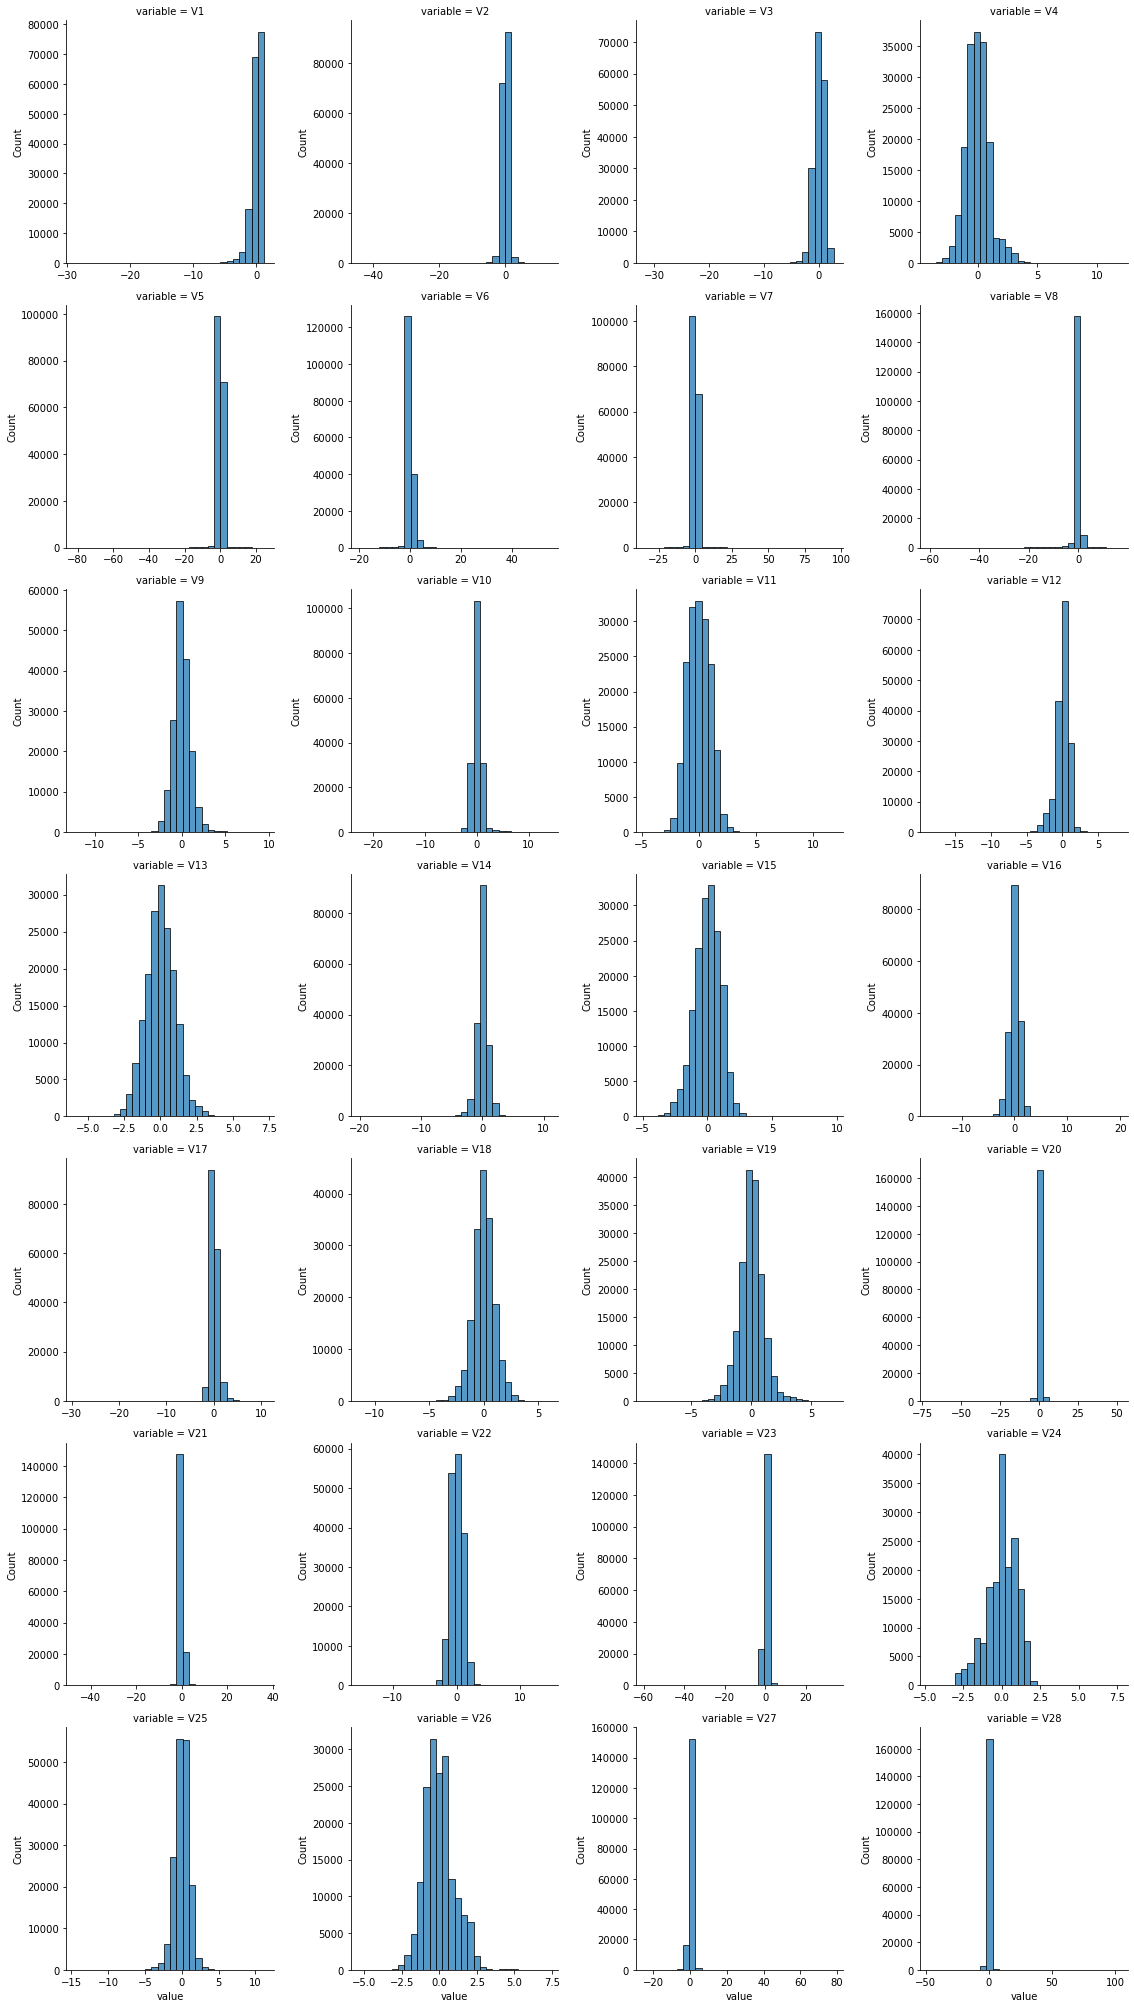

In [20]:
g = sns.FacetGrid(train[X_list].melt(), col='variable', col_wrap=4, sharex=False, sharey=False, height=4)
g.map(sns.histplot, 'value', bins=30)

In [21]:
b = train[X_list].describe()

pd.set_option('float_format', '{:.17f}'.format)

b

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,170883.00000000000000000,170883.00000000000000000,170883.00000000000000000,170883.00000000000000000,170883.00000000000000000,170883.00000000000000000,170883.00000000000000000,170883.00000000000000000,170883.00000000000000000,170883.00000000000000000,...,170883.00000000000000000,170883.00000000000000000,170883.00000000000000000,170883.00000000000000000,170883.00000000000000000,170883.00000000000000000,170883.00000000000000000,170883.00000000000000000,170883.00000000000000000,170883.00000000000000000
mean,-0.00000000000000002,0.00000000000000001,0.00000000000000001,0.00000000000000006,0.00000000000000001,-0.00000000000000002,0.00000000000000001,0.00000000000000004,-0.00000000000000003,0.00000000000000001,...,-0.00000000000000002,-0.00000000000000002,-0.00000000000000001,-0.00000000000000002,0.00000000000000002,0.00000000000000001,0.00000000000000000,0.00000000000000000,0.00000000000000001,0.00000000000000001
std,1.00000292599143781,1.00000292599143603,1.00000292599143648,1.00000292599143470,1.00000292599143270,1.00000292599142782,1.00000292599143514,1.00000292599144647,1.00000292599143514,1.00000292599144158,...,1.00000292599143048,1.00000292599143603,1.00000292599144158,1.00000292599143070,1.00000292599144225,1.00000292599143781,1.00000292599144225,1.00000292599143825,1.00000292599145069,1.00000292599143670
min,-28.63083014754338862,-43.78152468214717175,-31.64104552415514249,-4.00754275372509117,-81.04217367245888681,-19.46197869258674373,-34.26732700007078591,-59.96152966224929060,-12.13570337314410530,-22.48077800687912742,...,-8.85755413776865552,-70.34412419878559319,-46.58125078221441839,-15.05140473018457214,-59.32743653286670593,-4.69433060878632169,-14.35240728493698903,-5.25504130603696318,-24.45490292929569520,-46.67476596068121353
25%,-0.46549684353774257,-0.36095433498445501,-0.58096077913115618,-0.59807445916588986,-0.49095247604852088,-0.57269942201788160,-0.43446061946242165,-0.16833410110278454,-0.58582943623169670,-0.48792228372914981,...,-0.56029635507889697,-0.27406620678719951,-0.30529777359939231,-0.74500537060139105,-0.26140805197031369,-0.58573430560089834,-0.60762684076975204,-0.67801999307398975,-0.17423051892394853,-0.16017656800117325
50%,0.00909051378861668,0.03959522004650732,0.11799949766054788,-0.01461329113831179,-0.03896959655555198,-0.20482318361822713,0.03302360483670146,0.02052162264622896,-0.04583628161859565,-0.08379525021531441,...,0.00483989335718109,-0.08152979451006967,-0.03923714180061896,0.00821784298262231,-0.01775894426454787,0.06668059890473875,0.03094283074679189,-0.10636957891970501,0.00489827342365328,0.03482516466979534
75%,0.66863046634347301,0.48366791247335628,0.67322792119958996,0.52213713931251293,0.43663332446636949,0.29620366749247562,0.45032072446987037,0.27058958606274275,0.54581839309357927,0.41535687116722431,...,0.56265827359375775,0.17094384473691429,0.24996781996903042,0.72897176476733727,0.23907945443508746,0.72620561797548389,0.67531039308221241,0.49990281829719885,0.22625005428305522,0.23746052788451827
max,1.24708640694005712,13.27972677754498498,2.68735529830933562,11.79439994156224181,24.79682042280426302,54.53046765151839992,94.87466066788270780,16.04424236507932733,9.46718136257869602,13.94276549055490477,...,6.86312665020769774,50.88207618532244680,36.38153325276604022,14.45965219506350685,33.66053680064116094,7.58272985383198428,11.21224143048325317,7.29338794662139378,78.13184263418261821,102.38882940869228833


 ## ALGORITHMS

### 1. Logistic Regression

In [22]:
log_reg = LogisticRegression(random_state = 0)
log_reg.fit(train[X_list], train[y_list])

C:\Users\khann\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

In [23]:
train['prediction_logreg'] = log_reg.predict(train[X_list])
train.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,target,prediction_logreg
201477,0.92973064187633525,-0.19169637955319169,-0.09020799893580758,1.05162934000032160,-0.60413320002094084,-0.54998568582281104,-0.29993271493349360,0.01009899482364291,0.97007054966990391,0.16835712819208612,...,-0.23605907537487597,-0.77887205982808627,0.67812119927054559,0.37733180509687325,-0.99101214098985912,-2.07310127475352113,0.09551845719306516,-0.05182514831107966,0,0
210354,-0.37507019584290185,0.59162854626227623,0.89499313267214686,-0.22663800161145603,-0.20618562714340730,-0.27398596974765804,0.12888141158247113,0.34386922330310610,-0.05801132298828780,-1.06201809598788643,...,-0.07753669321027315,-0.26487051138457712,-0.04804212052921560,-0.16206009275108846,-0.52690369399796932,-1.08680529619182087,0.10450516248451418,0.24309697350758927,0,0
218330,-0.50198565044247379,0.73073043347147781,1.61500596595959678,1.59365627938594989,0.62237906849627223,0.69561383532403898,0.42392571688098551,0.26456927911842121,-1.28446736265709527,0.16508456366558114,...,0.23283118085129473,0.52710964620419465,-0.67552466465924166,0.92478110793545909,1.35572614678093761,0.08698612349541661,0.03822244704680442,0.22347446819027716,0,0
237957,-0.92565077015025632,-4.54397928854049749,-2.02400754266820471,0.44105787867165147,-1.84353426161034051,0.70712138320130546,1.37378295580140652,-0.34408341638225792,-0.33108134580192622,-0.14416388772108762,...,1.40787688529996080,-2.25311026095966538,-2.32740703841967678,0.44618272357885780,-2.23497485029673282,-1.68839422478367007,-0.95880038625035857,0.93331792059032737,0,0
121958,0.62693689693660171,-0.47334522948369739,0.25488839935852792,-0.49097570102191185,-0.73627378400149224,-0.47440467293424810,-0.39402575674866203,-0.15192672285788847,-0.68380179768310478,0.49887237453145888,...,0.03760976292937216,-0.32271562235191570,-0.09655022415883928,-0.18206214107452842,0.55954267314992379,-0.81504906362890073,0.00446230621199317,0.11732990459474088,0,0


In [24]:
val['prediction_logreg'] = log_reg.predict(val[X_list])
val.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,target,prediction_logreg
104878,0.60331556685867582,0.10418525770037100,0.12787855662245495,0.90712558233451757,0.06163280340794250,0.07403950371217360,0.05525923186936741,0.01216840997432718,0.29239802239520740,-0.11421367233980186,...,-0.17345626936419603,-0.20538080816624332,-0.21117547219058386,-0.69190526944311570,1.39677366326009333,-0.58482969658409045,0.09574648576140460,0.03711186431399043,0,0
105552,0.68018884750212882,-0.15909378511353378,-0.80007491130372677,-0.86589689047616913,1.33975341927906366,2.32937184421387578,-0.48353883116121327,0.63214128194378827,0.13531219570917796,-0.12530663257334687,...,-0.19073394741623317,-0.75884402759721825,-0.01205896461933188,1.76501865495832821,0.78922254011419291,2.06172606705787587,-0.19921265828672496,-0.00501866410668145,0,0
9128,-0.39044403646850429,0.84053767263812595,0.96556215711057480,0.04831891274883568,0.04133134220213797,-0.54831115566580979,0.54211379429510931,-0.15597355248359968,1.11134766882214731,0.11817477194683208,...,-0.62836739568199984,-1.07638617947649839,0.03382571958231652,0.66270007579009704,-0.33259989413436752,-0.02778729852290376,0.65059087844049390,-0.04566889722973921,0,0
201800,-0.38162419219569405,-0.00348907440632501,-0.14707793098348876,-1.69845978974350387,0.23349057924040056,-0.84434822810691157,0.08407986084900869,0.08457075387442665,1.20348907791739990,-0.72711719242953776,...,0.05344335348045744,0.25811905215941566,0.72356842052779746,1.24333383469449066,-4.43506589825651609,-0.59616955556640960,-0.03891278080331728,0.53040711324212497,0,0
60023,0.04116915063274466,0.74417023940854499,0.17399884608613064,0.84240391745446042,0.25483824027883734,-0.62385246628925817,0.52038942105415309,-0.08190752712637644,-0.32588049597149138,-0.48038374694312214,...,0.25656816828107909,0.86545678215792099,0.17102418169702513,0.46049251650008577,-2.06320497357457944,-0.96823517040973139,0.28110593690873220,0.62520144491782492,0,0


In [25]:
test['prediction_logreg'] = log_reg.predict(test[X_list])
test.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,target,prediction_logreg
43428,-8.38767867025732450,5.16804219732735604,-12.20993885751200558,6.70789598935402509,-9.82769158365845286,-2.10760187672027355,-13.13879986782228038,6.15870511488429440,-7.75091155036959112,-12.89978622539219444,...,1.59313716970471542,-1.55230339216430790,-3.81649199434525865,1.11250719200895065,-2.70402284407989280,-0.95955038397800885,-4.98750681852544542,-3.15383659542443162,1,1
49906,0.17347618385187141,-1.65275757989750249,-0.08615647037541535,-0.97576392357084696,-1.03366961831522453,0.75524102839339935,-0.41134209330102889,0.18559283671306784,0.81880731599089196,-0.51429062920852842,...,-0.28479575931283030,-1.29741607249217150,-0.85262291129189072,-1.91566310962178288,0.59954178815638359,-1.54819767272735698,0.10277772949710723,0.30926334301100344,0,0
29474,0.71140775750333973,-0.35645177195484778,0.11203816076533339,-0.72476734946615706,-0.38414542175254318,0.02958419456527707,-0.55939819139917446,0.00397258029288325,-0.88614673732103511,0.69435394233550507,...,0.13759774075826589,0.23180384617229718,-0.26983539925245659,-1.34203769737635081,0.97084846633852984,-0.48175896167870957,0.02965228445385117,0.01462120900320082,0,0
276481,-0.21832310249056816,0.99136356679277216,-1.09143584160926932,-0.24472317609402944,0.56034454861955374,-0.46965759005720670,0.21913286579192814,0.48203717701459897,-0.44245446354100176,-1.25643851484348978,...,0.48068429735544532,1.20291281468017197,-0.28925634209216183,-0.03002493600970054,-0.39369019833728308,-0.32710646578836605,-0.58525026260840396,0.00645376631072799,0,0
278846,1.02335662520171033,-0.08352429840044474,-0.66352233040803277,0.23272987784159996,-0.12933440855497905,-0.71212075015152587,0.03523128415845372,-0.12955898462112733,0.33004460697283383,0.23958606861653173,...,-0.31850875809515389,-0.84844354148490397,0.56132777298944558,0.10022353093800954,-0.68634171505224995,0.36231960051436074,-0.19143095609538877,-0.21286976663872723,0,0


In [26]:
cm_lg_tr = confusion_matrix(train['target'], train['prediction_logreg'])
print(cm_lg_tr)

[[170540     27]
 [   117    199]]


Text(0.5, 257.44, 'Predicted label')

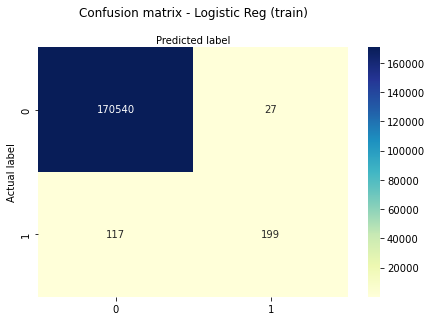

In [27]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_lg_tr), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix - Logistic Reg (train)', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [28]:
cm_lg_val = confusion_matrix(val['target'], val['prediction_logreg'])
print(cm_lg_val)

[[56875     9]
 [   32    46]]


Text(0.5, 257.44, 'Predicted label')

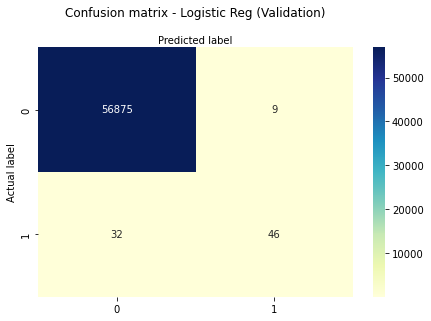

In [29]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_lg_val), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix - Logistic Reg (Validation)', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [30]:
cm_lg_ts = confusion_matrix(test['target'], test['prediction_logreg'])
print(cm_lg_ts)

[[56854    10]
 [   42    56]]


Text(0.5, 257.44, 'Predicted label')

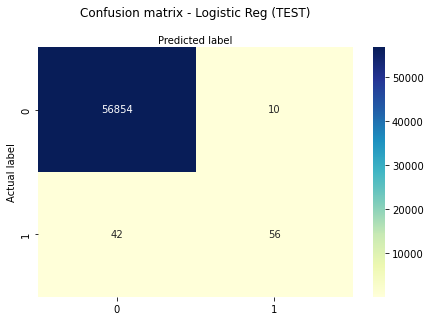

In [31]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_lg_ts), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix - Logistic Reg (TEST)', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [32]:
def calculate_metrics(df, x):
    acc = accuracy_score(df['target'], df[x])
    prec = precision_score(df['target'], df[x])
    rec = recall_score(df['target'], df[x])
    f1 = f1_score(df['target'], df[x])
    auc = roc_auc_score(df['target'], df[x])
    
    print(f" Accuracy is {acc}")
    print(f" Precision is {prec:2f}")
    print(f" Recall is {rec:2f}")
    print(f" F1-Score is {f1:2f}")
    print(f" AUC score is {auc:2f}")


In [33]:
calculate_metrics(train, 'prediction_logreg')

 Accuracy is 0.9991573181650603
 Precision is 0.880531
 Recall is 0.629747
 F1-Score is 0.734317
 AUC score is 0.814794


In [34]:
calculate_metrics(val, 'prediction_logreg')

 Accuracy is 0.9992802219023208
 Precision is 0.836364
 Recall is 0.589744
 F1-Score is 0.691729
 AUC score is 0.794793


In [35]:
calculate_metrics(test, 'prediction_logreg')

 Accuracy is 0.9990871107053826
 Precision is 0.848485
 Recall is 0.571429
 F1-Score is 0.682927
 AUC score is 0.785626


## 2. K Neighbours

In [36]:
knn = KNeighborsClassifier(n_neighbors=15)

In [37]:
# train the classifier using the training set
knn.fit(train[X_list], train[y_list])

C:\Users\khann\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=15)

### 2.1 - KNN  ON TRAIN SET - 

In [38]:
# make predictions on the Train set
train['prediction_KNN'] = knn.predict(train[X_list])

In [39]:
cm_knn_tr = confusion_matrix(train['target'], train['prediction_KNN'])
cm_knn_tr

array([[170532,     35],
       [    78,    238]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

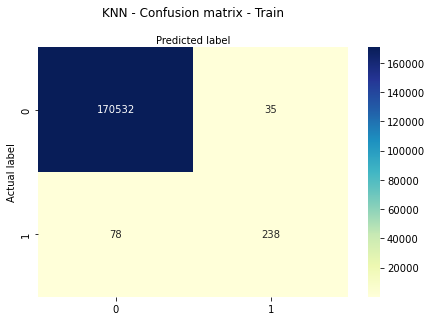

In [40]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_knn_tr), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('KNN - Confusion matrix - Train', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [41]:
calculate_metrics(train, 'prediction_KNN')

 Accuracy is 0.9993387288378598
 Precision is 0.871795
 Recall is 0.753165
 F1-Score is 0.808149
 AUC score is 0.876480


### 2.2 - KNN ON VAL SET -

In [42]:
# make predictions on the VAL set
val['prediction_KNN'] = knn.predict(val[X_list])

In [43]:
cm_knn_val = confusion_matrix(val['target'], val['prediction_KNN'])
cm_knn_val

array([[56877,     7],
       [   18,    60]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

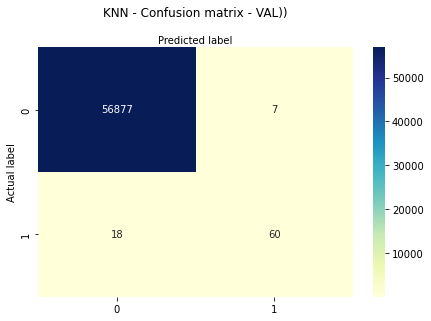

In [44]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_knn_val), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('KNN - Confusion matrix - VAL))', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [45]:
calculate_metrics(val, 'prediction_KNN')

 Accuracy is 0.9995611109160493
 Precision is 0.895522
 Recall is 0.769231
 F1-Score is 0.827586
 AUC score is 0.884554


### 2.3 - KNN  ON TEST SET - 

In [46]:
# make predictions on the Test set
test['prediction_KNN'] = knn.predict(test[X_list])

In [47]:
cm_knn_ts = confusion_matrix(test['target'], test['prediction_KNN'])
cm_knn_ts

array([[56852,    12],
       [   24,    74]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

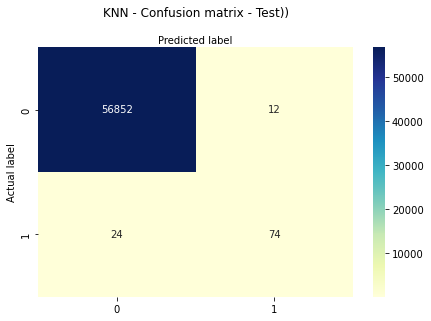

In [48]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_knn_ts), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('KNN - Confusion matrix - Test))', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [49]:
calculate_metrics(test, 'prediction_KNN')

 Accuracy is 0.9993679997191109
 Precision is 0.860465
 Recall is 0.755102
 F1-Score is 0.804348
 AUC score is 0.877446


## 3. Support Vector Machine

In [50]:
clf = svm.SVC(kernel='linear', C=1)

In [51]:
# train the classifier using the training set
clf.fit(train[X_list], train[y_list])


C:\Users\khann\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, kernel='linear')

### 3.1 SVM on TRAIN Set

In [52]:
# make predictions on the Train set
train['prediction_SVM'] = clf.predict(train[X_list])

In [53]:
cm_svm_tr = confusion_matrix(train['target'], train['prediction_SVM'])
cm_svm_tr

array([[170518,     49],
       [    65,    251]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

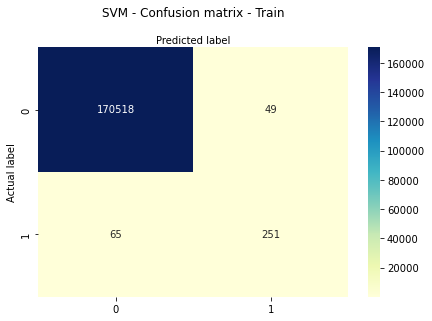

In [54]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_svm_tr), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('SVM - Confusion matrix - Train', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [55]:
calculate_metrics(train, 'prediction_SVM')

 Accuracy is 0.9993328768806727
 Precision is 0.836667
 Recall is 0.794304
 F1-Score is 0.814935
 AUC score is 0.897008


### 3.2 SVM on VALIDATION SET

In [56]:
val['prediction_SVM'] = clf.predict(val[X_list])

In [57]:
cm_svm_val = confusion_matrix(val['target'], val['prediction_SVM'])
cm_svm_val

array([[56875,     9],
       [   17,    61]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

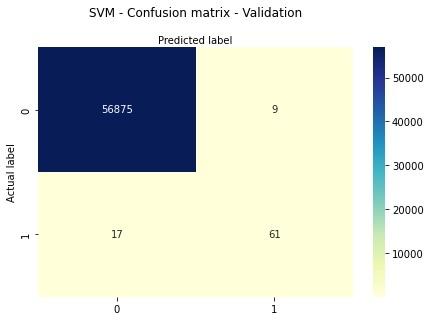

In [58]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_svm_val), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('SVM - Confusion matrix - Validation', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [59]:
calculate_metrics(val, 'prediction_SVM')

 Accuracy is 0.9995435553526912
 Precision is 0.871429
 Recall is 0.782051
 F1-Score is 0.824324
 AUC score is 0.890947


### 3.3 SVM on TEST SET

In [60]:
test['prediction_SVM'] = clf.predict(test[X_list])

In [61]:
cm_svm_ts = confusion_matrix(test['target'], test['prediction_SVM'])
cm_svm_ts

array([[56846,    18],
       [   23,    75]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

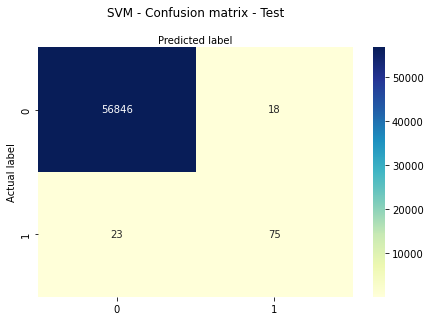

In [62]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_svm_ts), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('SVM - Confusion matrix - Test', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [63]:
calculate_metrics(test, 'prediction_SVM')

 Accuracy is 0.9992802219023208
 Precision is 0.806452
 Recall is 0.765306
 F1-Score is 0.785340
 AUC score is 0.882495


## 4. Decision tree

In [64]:
dct = DecisionTreeClassifier(random_state=42)

In [65]:
# Train the model using the training data
dct.fit(train[X_list], train[y_list])

DecisionTreeClassifier(random_state=42)

### 4.1 - Decision Tree - TRAIN

In [66]:
# Make predictions on the train data
train['prediction_decision_tree'] = dct.predict(train[X_list])

In [67]:
#VALIDATION
cm_dct_tr = confusion_matrix(train['target'], train['prediction_decision_tree'])
cm_dct_tr

array([[170567,      0],
       [     0,    316]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

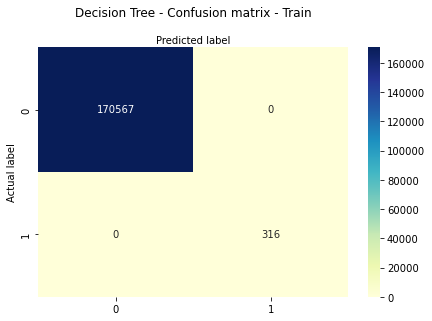

In [68]:
#VALIDATION - Confusion Matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_dct_tr), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Decision Tree - Confusion matrix - Train', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [69]:
calculate_metrics(train, 'prediction_decision_tree')

 Accuracy is 1.0
 Precision is 1.000000
 Recall is 1.000000
 F1-Score is 1.000000
 AUC score is 1.000000


### 4.2 Decision Tree - VALIDATION

In [70]:
val['prediction_decision_tree'] = dct.predict(val[X_list])

In [71]:
cm_dct_val = confusion_matrix(val['target'], val['prediction_decision_tree'])
cm_dct_val

array([[56860,    24],
       [   17,    61]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

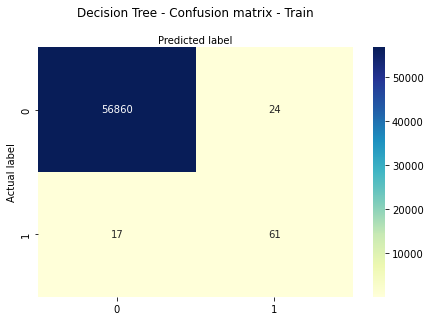

In [72]:
#Train - Confusion Matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_dct_val), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Decision Tree - Confusion matrix - Train', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [73]:
calculate_metrics(val, 'prediction_decision_tree')

 Accuracy is 0.9992802219023208
 Precision is 0.717647
 Recall is 0.782051
 F1-Score is 0.748466
 AUC score is 0.890815


### 4.3 Test SET

In [74]:
test['prediction_decision_tree'] = dct.predict(test[X_list])

In [75]:
cm_dct_ts = confusion_matrix(test['target'], test['prediction_decision_tree'])
cm_dct_ts

array([[56831,    33],
       [   21,    77]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

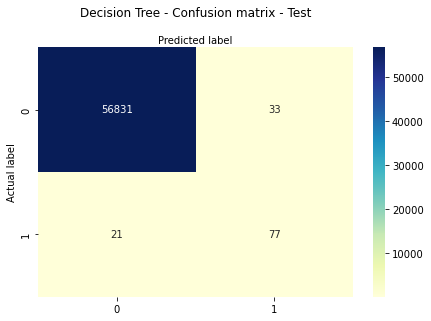

In [76]:
#Test - Confusion Matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_dct_ts), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Decision Tree - Confusion matrix - Test', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [77]:
calculate_metrics(test, 'prediction_decision_tree')

 Accuracy is 0.9990519995786665
 Precision is 0.700000
 Recall is 0.785714
 F1-Score is 0.740385
 AUC score is 0.892567


## 5 - Random Forest Classifier

In [78]:
rfc = RandomForestClassifier(n_estimators=100)

In [79]:
# Train the model using the training data

rfc.fit(train[X_list], train[y_list])

C:\Users\khann\AppData\Local\Temp\ipykernel_22356\2846747427.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(train[X_list], train[y_list])


RandomForestClassifier()

### 5.1 TRAIN

In [80]:
# Make predictions on the train data
train['random_forest_cl'] = rfc.predict(train[X_list])

In [81]:
#Train
cm_rfc_tr = confusion_matrix(train['target'], train['random_forest_cl'])
cm_rfc_tr

array([[170567,      0],
       [     0,    316]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

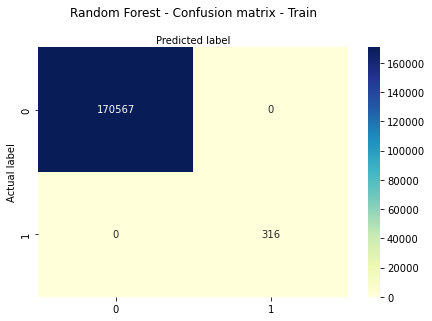

In [82]:
#TRAIN - Confusion Matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_rfc_tr), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Random Forest - Confusion matrix - Train', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [83]:
calculate_metrics(train, 'random_forest_cl')

 Accuracy is 1.0
 Precision is 1.000000
 Recall is 1.000000
 F1-Score is 1.000000
 AUC score is 1.000000


### 5.2 VALIDATION

In [84]:
val['random_forest_cl'] = rfc.predict(val[X_list])

In [85]:
cm_rfc_val = confusion_matrix(val['target'], val['random_forest_cl'])
cm_rfc_val

array([[56883,     1],
       [   19,    59]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

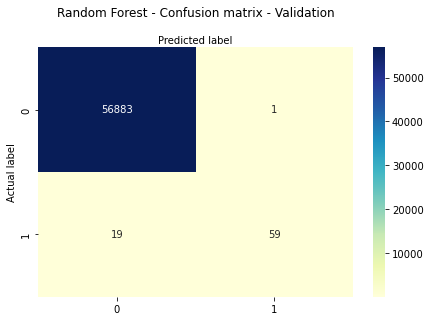

In [86]:
#Validation - Confusion Matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_rfc_val), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Random Forest - Confusion matrix - Validation', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [87]:
calculate_metrics(val, 'random_forest_cl')

 Accuracy is 0.9996488887328394
 Precision is 0.983333
 Recall is 0.756410
 F1-Score is 0.855072
 AUC score is 0.878196


### 5.3 TEST

In [88]:
test['random_forest_cl'] = rfc.predict(test[X_list])

In [89]:
cm_rfc_ts = confusion_matrix(test['target'], test['random_forest_cl'])
cm_rfc_ts

array([[56862,     2],
       [   22,    76]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

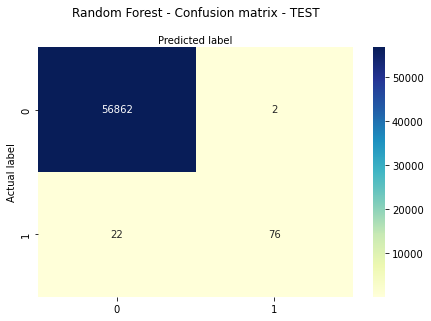

In [90]:
#TEST - Confusion Matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_rfc_ts), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Random Forest - Confusion matrix - TEST', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [91]:
calculate_metrics(test, 'random_forest_cl')

 Accuracy is 0.9995786664794073
 Precision is 0.974359
 Recall is 0.775510
 F1-Score is 0.863636
 AUC score is 0.887738


## 6 - Gradient Boosting Machine.

In [92]:
gbm = GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=42)

In [93]:
# Train the model using the training data

gbm.fit(train[X_list], train[y_list])

C:\Users\khann\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(random_state=42)

## 6.1 - TRAIN SET

In [94]:
# Make predictions on the train data
train['gbm'] = gbm.predict(train[X_list])

In [95]:
#Train
cm_gbm_tr = confusion_matrix(train['target'], train['gbm'])
cm_gbm_tr

array([[170546,     21],
       [   242,     74]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

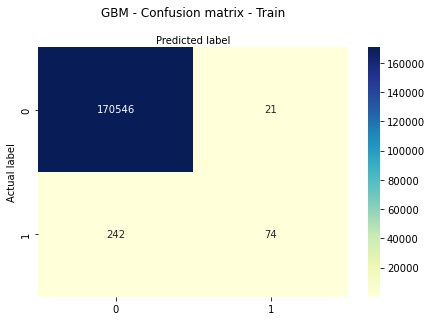

In [96]:
#TRAIN - Confusion Matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_gbm_tr), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('GBM - Confusion matrix - Train', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [97]:
calculate_metrics(train, 'gbm')

 Accuracy is 0.9984609352597976
 Precision is 0.778947
 Recall is 0.234177
 F1-Score is 0.360097
 AUC score is 0.617027


## 6.2 - VALIDATION SET

In [98]:
# Make predictions on the validation data
val['gbm'] = gbm.predict(val[X_list])

In [99]:
#Validation CM
cm_gbm_val = confusion_matrix(val['target'], val['gbm'])
cm_gbm_val

array([[56874,    10],
       [   54,    24]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

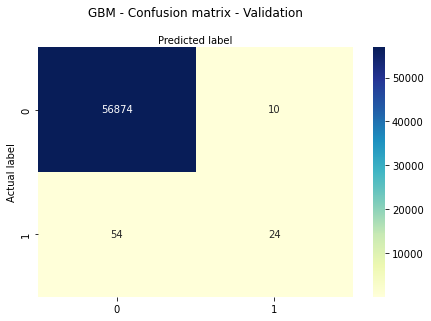

In [100]:
#VALIDATION - Confusion Matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_gbm_val), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('GBM - Confusion matrix - Validation', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [101]:
calculate_metrics(val, 'gbm')

 Accuracy is 0.9988764439450862
 Precision is 0.705882
 Recall is 0.307692
 F1-Score is 0.428571
 AUC score is 0.653758


## 6.3 - TEST SET

In [102]:
# Make predictions on the TEST data
test['gbm'] = gbm.predict(test[X_list])

In [103]:
#Test
cm_gbm_ts = confusion_matrix(test['target'], test['gbm'])
cm_gbm_ts

array([[56851,    13],
       [   80,    18]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

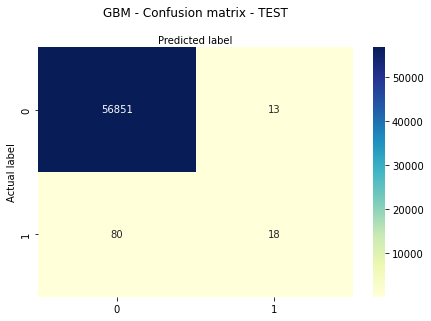

In [104]:
#TEST - Confusion Matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_gbm_ts), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('GBM - Confusion matrix - TEST', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [105]:
calculate_metrics(test, 'gbm')

 Accuracy is 0.9983673326077034
 Precision is 0.580645
 Recall is 0.183673
 F1-Score is 0.279070
 AUC score is 0.591722


## 7 - XGBoost

In [106]:
xgb_clf = xgb.XGBClassifier()

In [107]:
#Training the model using train set

xgb_clf.fit(train[X_list], train[y_list])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

## 7.1 - TRAIN

In [108]:
# Make predictions on the train data
train['xgboost'] = xgb_clf.predict(train[X_list])

In [109]:
#Train - Conf matrix
cm_xg_tr = confusion_matrix(train['target'], train['xgboost'])
cm_xg_tr

array([[170567,      0],
       [     0,    316]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

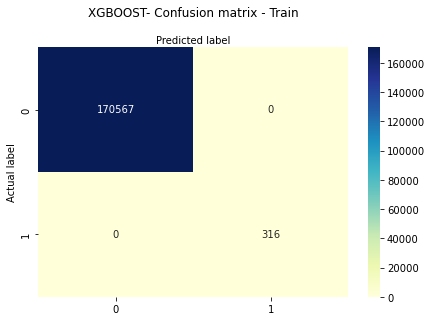

In [110]:
#TRAIN - Confusion Matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_xg_tr), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('XGBOOST- Confusion matrix - Train', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [111]:
calculate_metrics(train, 'xgboost')

 Accuracy is 1.0
 Precision is 1.000000
 Recall is 1.000000
 F1-Score is 1.000000
 AUC score is 1.000000


## 7.2 - Validation Set

In [112]:
# Make predictions on the train data
val['xgboost'] = xgb_clf.predict(val[X_list])

In [113]:
#Validation - Conf matrix
cm_xg_val = confusion_matrix(val['target'], val['xgboost'])
cm_xg_val

array([[56883,     1],
       [   16,    62]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

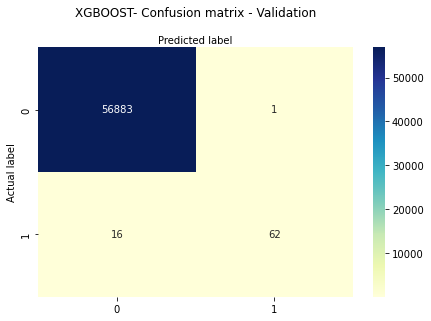

In [114]:
#Validation - Confusion Matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_xg_val), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('XGBOOST- Confusion matrix - Validation', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [115]:
calculate_metrics(val, 'xgboost')

 Accuracy is 0.9997015554229135
 Precision is 0.984127
 Recall is 0.794872
 F1-Score is 0.879433
 AUC score is 0.897427


## 7.3 - TEST Set

In [116]:
# Make predictions on the train data
test['xgboost'] = xgb_clf.predict(test[X_list])

In [117]:
#TEST - Conf matrix
cm_xg_ts = confusion_matrix(test['target'], test['xgboost'])
cm_xg_ts

array([[56863,     1],
       [   20,    78]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

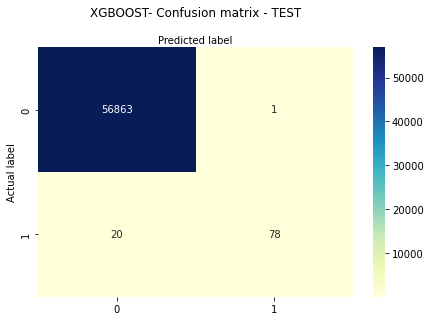

In [118]:
#Validation - Confusion Matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_xg_ts), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('XGBOOST- Confusion matrix - TEST', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [119]:
calculate_metrics(test, 'xgboost')

 Accuracy is 0.9996313331694814
 Precision is 0.987342
 Recall is 0.795918
 F1-Score is 0.881356
 AUC score is 0.897950
